This notebook contains some usage examples for the [Animal Audiograms Database](https://animalaudiograms.museumfuernaturkunde.berlin/).

If you have any questions, please contact Alvaro Ortiz Troncoso (a.ortiztroncoso@mfn.berlin)

## Downloading data
To download audiogram data, open an audiogram and click on the "Download original data" button (figure 1). 

You will be given the choice to save the data or to open it in your spreadsheet program (e.g. Excel or equivalent). 
Choose "Save file". The downloaded file will be called "Audiogram_XX.csv", where XX is the Id of the audiogram in the database. The data file is in .csv format ("comma-separated values").

Once the file is on your local computer, you can open and process the data using R or Python. The following examples are in R.

![](images/download.png)

*Fig. 1: Downloading data*



## Plotting an audiogram
If you would like to plot the audiogram of the downloaded data using your own parameters for the plot, proceed as follows. An example file is provided in ./data/Audiogram_30.csv, change this to the path of your downloaded file.

In [70]:
# load graphics libraries
library(ggplot2)

# Read the downloaded data
data_file <- "./data/Audiogram_30.csv" # change this to your file
audiogram <- read.table(data_file, header=TRUE, sep=",")

# prepare the labels for the plot axes
label_x <- "Frequency (kHz)"
label_y <- paste0("Threshold (dB ", audiogram$SPL.reference[1], ")")

# add some sensible limits
limits_x <- c(0.1, 200)  # Plot frequencies from 0.1 to 200 kHz
limits_y <- c(-50, 160)  # Plot SPL from -50 to 160 dB

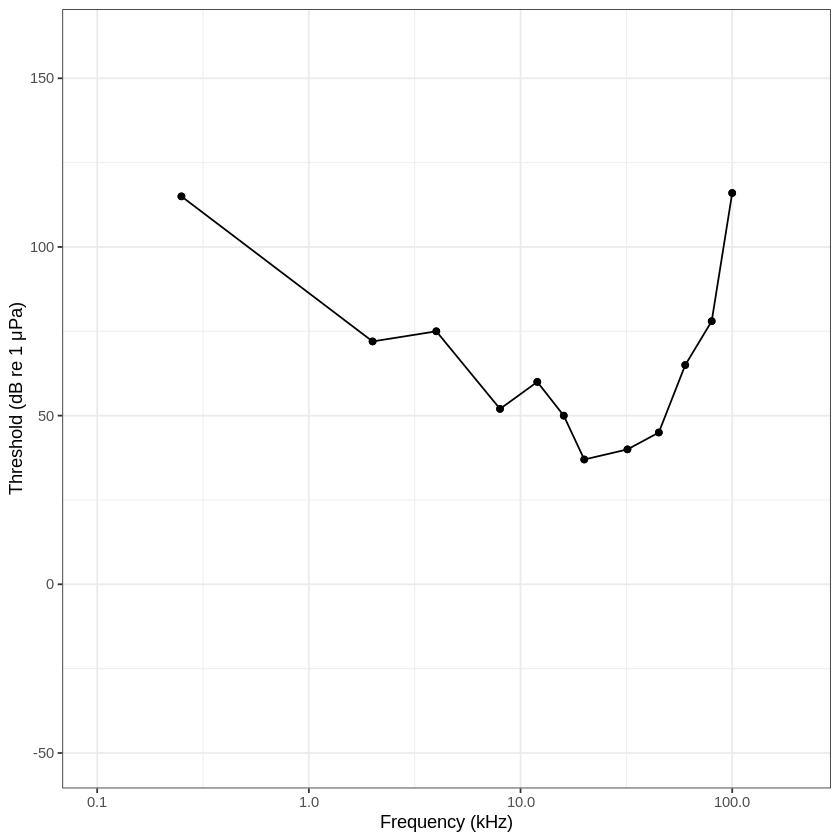

In [74]:
# a basic plot of SPL vs. frequency, frequency is on a logarithmic scale
basic_plot <- ggplot(audiogram, aes(Frequency.in.kHz, SPL)) +
    labs(x = label_x, y = label_y) +
    geom_line() + 
    geom_point() +
    scale_x_log10(limits = limits_x) +
    scale_y_continuous(limits = limits_y) +
    theme_bw()
basic_plot

### Plotting the values of the data points

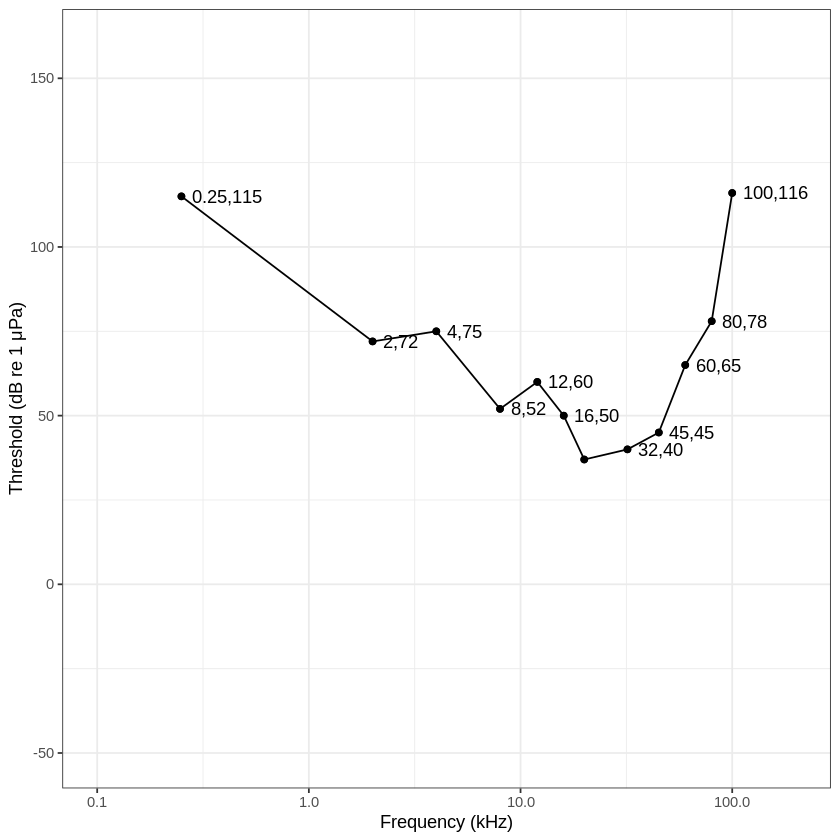

In [106]:
# basic plot, with data point values
basic_plot +
    geom_text(aes(label=paste(Frequency.in.kHz, SPL, sep=",")), check_overlap = TRUE,  hjust=0, nudge_x = 0.05)

### Plotting vector graphics
To use the plot in a publication, you might need to save your plot in scalable vector graphics format.

In [108]:
svg(filename="./data/Audiogram_30.svg") # change this to where you want to save the graphics file
basic_plot
dev.off()

### Smoothing the curve
You might want to fit a function to your audiogram instead of joining data points with straight lines (see Wright 2015 for an example of why this might be useful). In the following example, I applied locally estimated scatterplot smoothing (LOESS) to the data points.

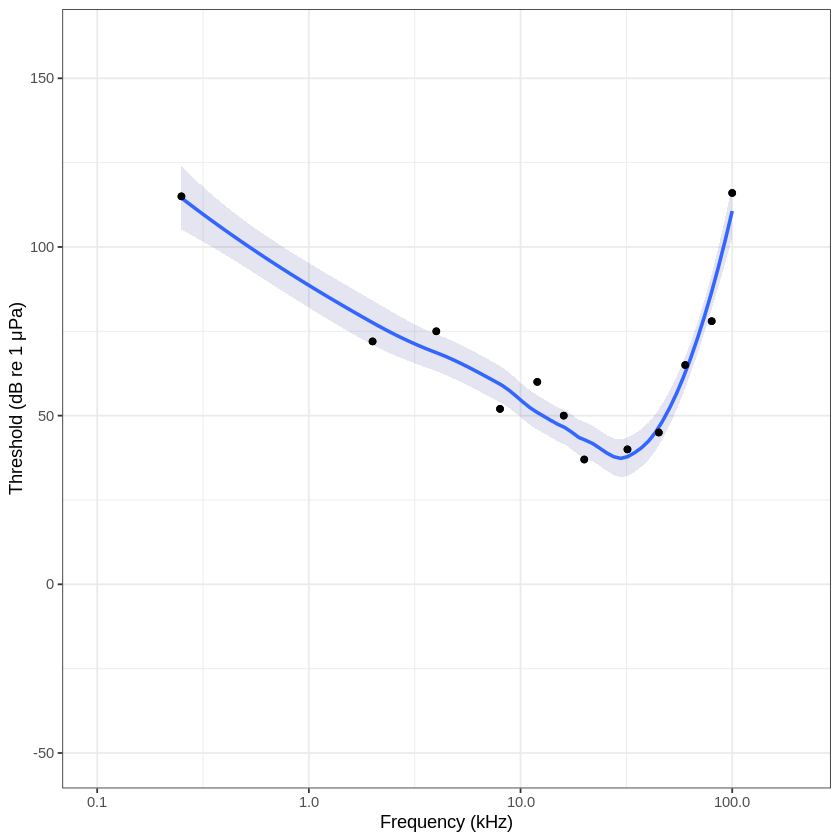

In [112]:
ggplot(audiogram, aes(Frequency.in.kHz, SPL)) +
    labs(x = label_x, y = label_y) +
    geom_smooth(method='loess', formula = y ~ x, fill='navy', alpha=0.1) +
    geom_point() +
    scale_x_log10(limits = limits_x) +
    scale_y_continuous(limits = limits_y) +
    theme_bw()

## Getting data from the web service
Instead of downloading data, you can plot data directly from the database backend. The backend is accessible through a web service, and each audiogram is identified by its database id. This id is displayed on each audiogram page (fig. 2).

![](images/id.png)

*Fig. 2: Getting the id of an audiogram*

In this example, the audiogram's id is "30". You can then tell R to read the data from the web service as shown below.

In [116]:
# the backend URL of this audiogram
url <- paste0("https://animalaudiograms.museumfuernaturkunde.berlin/api/v1/download?id=", 30) # change the id to your id
audiogram <- read.table(url, header=TRUE, sep=",")
# proceed to plot the data as shown in the examples above ...

## References
Wright, A.J., 2015. Sound science: maintaining numerical and statistical standards in the pursuit of noise exposure criteria for marine mammals. Frontiers in Marine Science, 2, p.99.